<div style="background-color: #f9f9f9; border: 1px solid #ccc; padding: 15px; border-radius: 10px; font-family: Arial;">

<h2 style="color: #555; text-align: center;">Support Vector Machine (SVM) Algorithm</h2>

<p>The Support Vector Machine (SVM) is a powerful supervised learning algorithm used for both classification and regression tasks. It operates by finding the hyperplane that best separates classes in a high-dimensional feature space.</p>

<ul>
    <li><strong>Margin Maximization:</strong> SVM aims to find a hyperplane that maximizes the margin, which is the distance between the hyperplane and the nearest data points of each class. This ensures better generalization to unseen data.</li>
    <li><strong>Kernel Trick:</strong> SVM can efficiently handle non-linearly separable data by mapping the input features into a higher-dimensional space using kernel functions. This allows for more complex decision boundaries.</li>
    <li><strong>Robustness to Outliers:</strong> SVM is less sensitive to outliers due to its margin-based approach. It focuses on correctly classifying instances near the decision boundary.</li>
    <li><strong>Effective in High-Dimensional Spaces:</strong> SVM performs well even when the number of features is greater than the number of samples, making it suitable for complex datasets.</li>
    <li><strong>Memory Efficiency:</strong> It uses a subset of training points (support vectors) to define the decision boundary, which leads to memory efficiency.</li>
</ul>

<p>SVM is widely used in various fields such as image classification, text mining, bioinformatics, and more. Its versatility, robustness, and ability to handle non-linear data make it a valuable tool in machine learning.</p>

<p style="font-style: italic; text-align: center;">Keep in mind that SVM's performance may be influenced by the choice of kernel and its hyperparameters. Therefore, careful tuning is crucial for achieving optimal results.</p>

</div>


<img src="./separating_hyperplanes.png">

<img src = "./support-vector-machine-algorithm.png">

<img src="./SVM_margin.png">

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer

### Load our Breast Cancer Diagnostic dataset

In [5]:
breast_cancer = load_breast_cancer()
data_df = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)
data_df['diagnosis'] = breast_cancer.target

data_df.T

,0,1,2,3,4,5,6,7,8,9,...,559,560,561,562,563,564,565,566,567,568
mean radius,17.990000,20.570000,19.690000,11.420000,20.290000,12.450000,18.250000,13.710000,13.000000,12.460000,...,11.510000,14.050000,11.200000,15.220000,20.920000,21.560000,20.130000,16.600000,20.600000,7.760000
mean texture,10.380000,17.770000,21.250000,20.380000,14.340000,15.700000,19.980000,20.830000,21.820000,24.040000,...,23.930000,27.150000,29.370000,30.620000,25.090000,22.390000,28.250000,28.080000,29.330000,24.540000
mean perimeter,122.800000,132.900000,130.000000,77.580000,135.100000,82.570000,119.600000,90.200000,87.500000,83.970000,...,74.520000,91.380000,70.670000,103.400000,143.000000,142.000000,131.200000,108.300000,140.100000,47.920000
mean area,1001.000000,1326.000000,1203.000000,386.100000,1297.000000,477.100000,1040.000000,577.900000,519.800000,475.900000,...,403.500000,600.400000,386.000000,716.900000,1347.000000,1479.000000,1261.000000,858.100000,1265.000000,181.000000
mean smoothness,0.118400,0.084740,0.109600,0.142500,0.100300,0.127800,0.094630,0.118900,0.127300,0.118600,...,0.092610,0.099290,0.074490,0.104800,0.109900,0.111000,0.097800,0.084550,0.117800,0.052630
mean compactness,0.277600,0.078640,0.159900,0.283900,0.132800,0.170000,0.109000,0.164500,0.193200,0.239600,...,0.102100,0.112600,0.035580,0.208700,0.223600,0.115900,0.103400,0.102300,0.277000,0.043620
mean concavity,0.300100,0.086900,0.197400,0.241400,0.198000,0.157800,0.112700,0.093660,0.185900,0.227300,...,0.111200,0.044620,0.000000,0.255000,0.317400,0.243900,0.144000,0.092510,0.351400,0.000000
mean concave points,0.147100,0.070170,0.127900,0.105200,0.104300,0.080890,0.074000,0.059850,0.093530,0.085430,...,0.041050,0.043040,0.000000,0.094290,0.147400,0.138900,0.097910,0.053020,0.152000,0.000000
mean symmetry,0.241900,0.181200,0.206900,0.259700,0.180900,0.208700,0.179400,0.219600,0.235000,0.203000,...,0.138800,0.153700,0.106000,0.212800,0.214900,0.172600,0.175200,0.159000,0.239700,0.158700
mean fractal dimension,0.078710,0.056670,0.059990,0.097440,0.058830,0.076130,0.057420,0.074510,0.073890,0.082430,...,0.065700,0.061710,0.055020,0.071520,0.068790,0.056230,0.055330,0.056480,0.070160,0.058840


<Axes: >

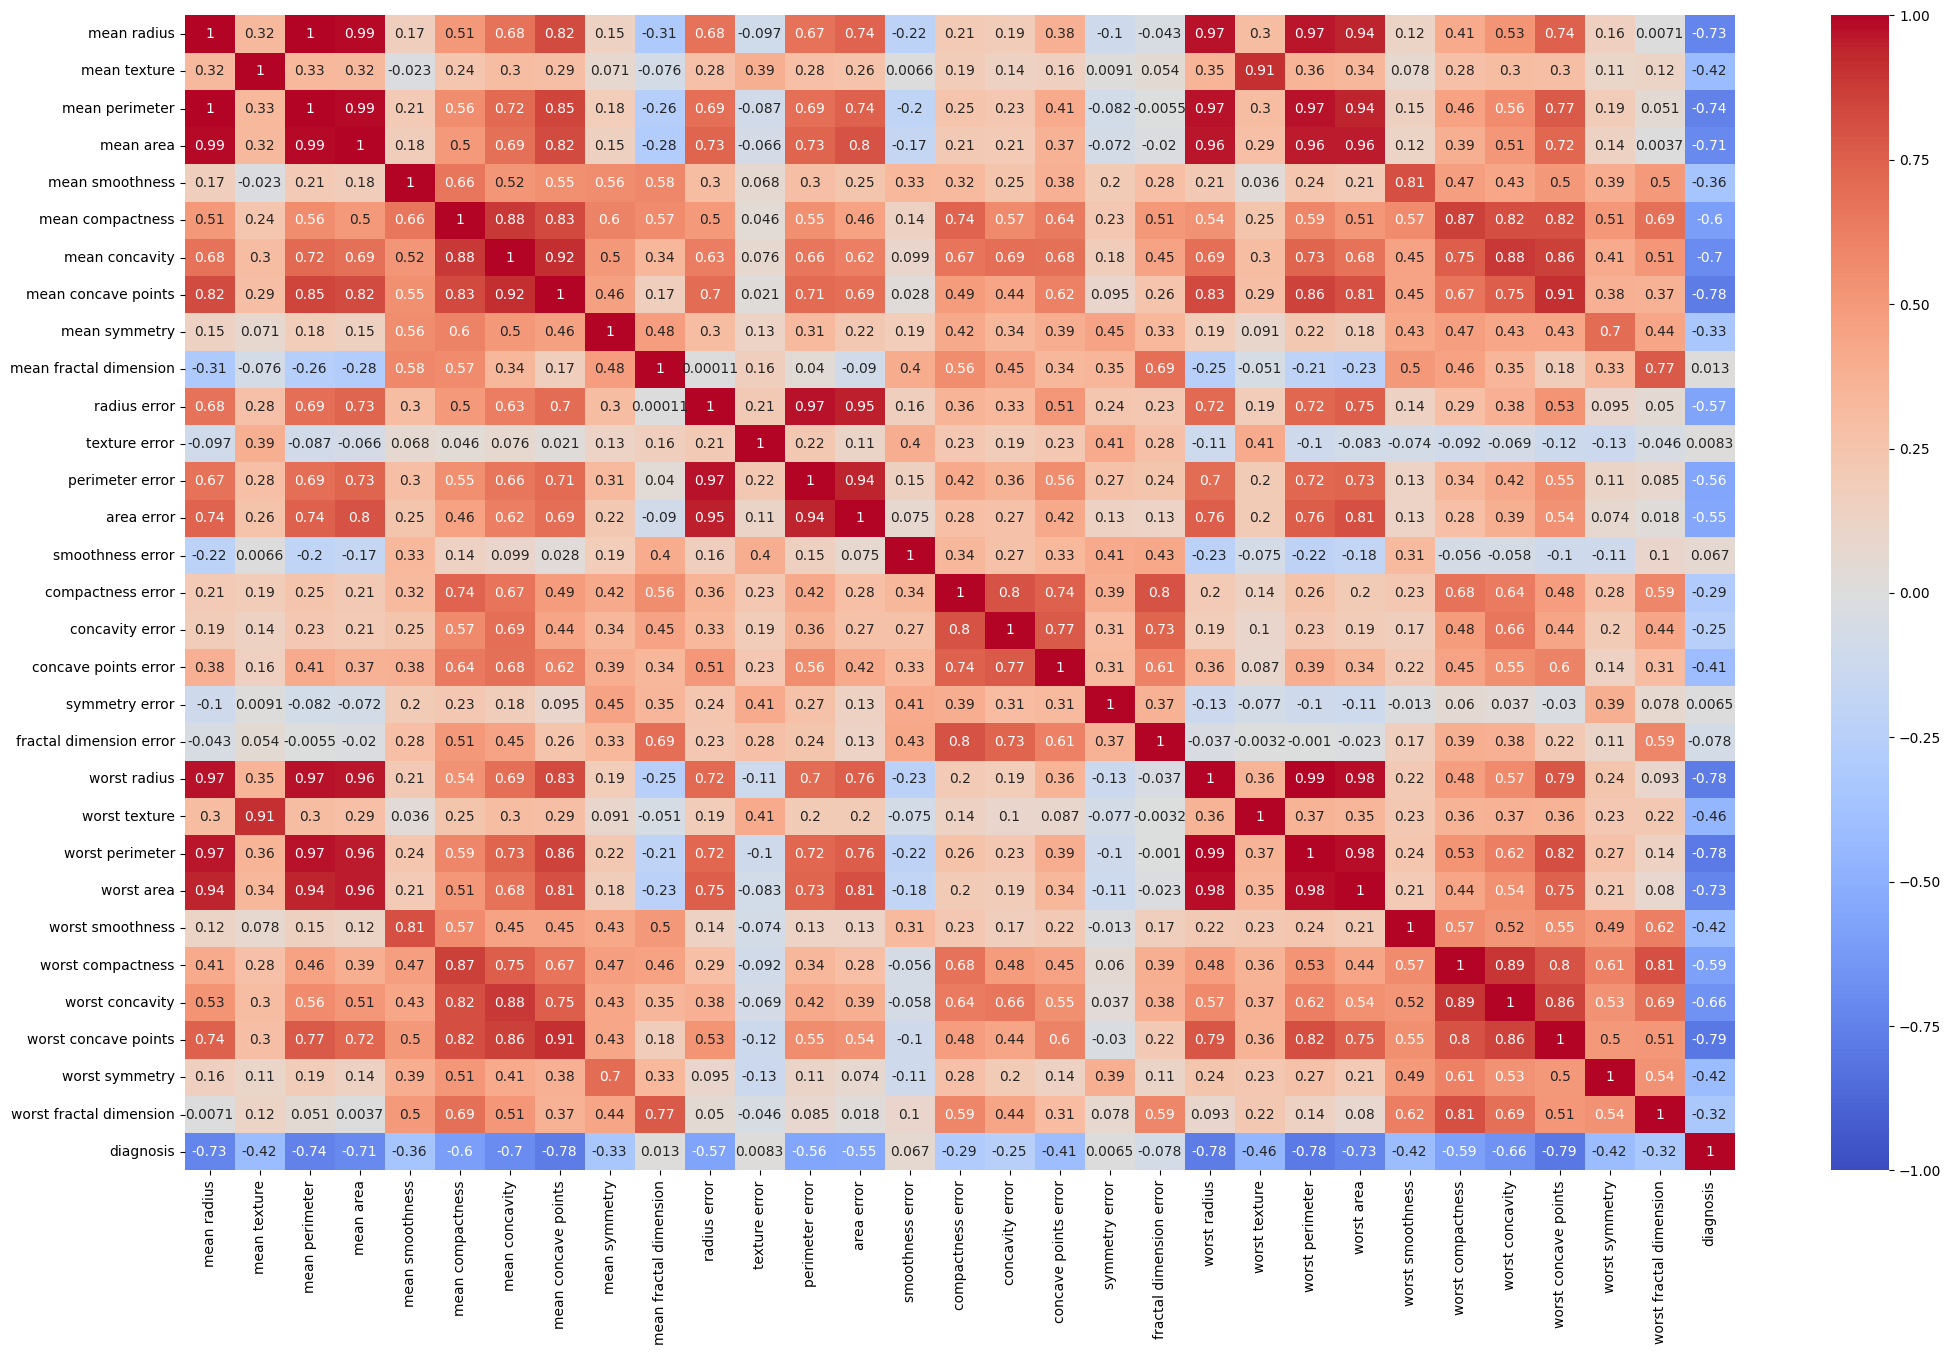

In [14]:
correlation = data_df.corr()
plt.figure(figsize=(25,15))
sns.heatmap(correlation, vmax=1, vmin=-1, cmap='coolwarm', annot=True)

### Split our data and train our model (SVC)

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

Seperate our data into X (features) and y (Target)

In [16]:
X = data_df.drop('diagnosis', axis=1)
y = data_df['diagnosis']

split the data into train and test sets

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.2, random_state=42)

initialize and train the SVM classifier

In [19]:
svm_classifier = SVC(kernel="linear")
svm_classifier.fit(X_train, y_train)

SVC(kernel='linear')

predict our model 

In [20]:
y_pred = svm_classifier.predict(X_test)

Evaluate our model

In [21]:
accuracy = accuracy_score(y_test, y_pred)
print(f"SVM Accuracy Score: {accuracy:0.2f}")

SVM Accuracy Score: 0.95


### Using Cross Validation to Enhace our model's reliability
import neccessary  classes and functions 

In [22]:
from sklearn.model_selection import cross_val_score, GridSearchCV
svm_classifier_cv = SVC()

<div style="background-color: #f9f9f9; border: 1px solid #ccc; padding: 15px; border-radius: 10px; font-family: Arial;">

<h2 style="color: #555; text-align: center;">Cross-Validation: Enhancing Model Reliability</h2>

<p>Cross-validation is a crucial technique in machine learning for assessing the performance and generalizability of a predictive model. It involves partitioning the dataset into multiple subsets, known as folds. The model is trained on several combinations of these folds and evaluated on the remaining portions. This process is repeated to ensure every subset serves as both training and validation data.</p>

<h3 style="color: #777;">Importance of Cross-Validation:</h3>

<ol>
    <li><strong>Robustness to Overfitting:</strong> Cross-validation helps identify if a model is overfitting to the training data. If a model performs exceptionally well on the training data but poorly on the validation data, it's a sign of overfitting.</li>
    <li><strong>Optimizing Hyperparameters:</strong> It aids in the selection of hyperparameters. By comparing performance across different folds, one can fine-tune hyperparameters for optimal model performance.</li>
    <li><strong>Improved Model Evaluation:</strong> It provides a more reliable estimate of a model's performance compared to a single train-test split. This is crucial for ensuring the model's performance on new, unseen data.</li>
    <li><strong>Utilization of Data:</strong> Cross-validation allows for better use of available data. It ensures that each data point is used for training and validation at least once, which is especially important when data is limited.</li>
    <li><strong>Reduced Variance in Results:</strong> By performing multiple iterations of cross-validation, we can reduce the variance in evaluation metrics, leading to more stable and consistent results.</li>
</ol>

<p style="font-style: italic; text-align: center; color: #777;">In summary, cross-validation enhances the reliability of machine learning models by providing a robust assessment of their performance. It helps in avoiding overfitting, fine-tuning models, and obtaining more accurate estimates of their real-world performance.</p>

</div>



<img src = "https://scikit-learn.org/stable/_images/grid_search_cross_validation.png" >


## Cross Validation

In [23]:
cv_scores = cross_val_score(svm_classifier_cv, X, y, cv=10)
print(f"Cross Validation Scores: {cv_scores}")
print(f"Mean CV Score: {cv_scores.mean()}")

Cross Validation Scores: [0.89473684 0.84210526 0.89473684 0.92982456 0.92982456 0.92982456
 0.94736842 0.92982456 0.92982456 0.91071429]
Mean CV Score: 0.9138784461152882


<div style="background-color: #f9f9f9; border: 1px solid #ccc; padding: 15px; border-radius: 10px; font-family: Arial;">

<h2 style="color: #555; text-align: center;">Grid Search: Fine-Tuning Model Hyperparameters</h2>

<p>Grid search is a powerful technique used in machine learning for systematically searching through a specified hyperparameter space to find the optimal combination that yields the best model performance.</p>

<h3 style="color: #777;">How Grid Search Works:</h3>

<p>Grid search operates by defining a grid of hyperparameters to explore. For each combination of hyperparameters, the model is trained and evaluated using cross-validation. The performance metrics (e.g., accuracy, F1 score) are recorded for each combination. Finally, the hyperparameter values resulting in the highest performance are selected.</p>

<h3 style="color: #777;">Importance of Grid Search:</h3>

<ol>
    <li><strong>Hyperparameter Optimization:</strong> Grid search automates the process of hyperparameter tuning, saving time and effort in manually testing different combinations.</li>
    <li><strong>Improved Model Performance:</strong> By systematically exploring a range of hyperparameters, grid search helps find the configuration that leads to the highest model performance.</li>
    <li><strong>Prevention of Overfitting:</strong> Grid search aids in selecting hyperparameters that generalize well to new, unseen data, reducing the risk of overfitting.</li>
    <li><strong>Enhanced Model Robustness:</strong> A well-tuned model with optimized hyperparameters is more likely to perform consistently across different datasets and scenarios.</li>
</ol>

<p style="font-style: italic; text-align: center; color: #777;">In summary, grid search is an essential tool for fine-tuning model hyperparameters, leading to improved performance, robustness, and generalizability of machine learning models.</p>

</div>


Perform Grid Search

In [24]:
param_grid = {
    "C": [ 1, 10, 100],
    "gamma": [1, 0.1, 0.01],
    'kernel': ["linear", "rbf"]
}

grid_search = GridSearchCV(svm_classifier_cv, param_grid, refit=True, verbose=3)
grid_search.fit(X,y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV 1/5] END .......C=1, gamma=1, kernel=linear;, score=0.947 total time=   1.1s
[CV 2/5] END .......C=1, gamma=1, kernel=linear;, score=0.930 total time=   3.0s
[CV 3/5] END .......C=1, gamma=1, kernel=linear;, score=0.974 total time=   2.3s
[CV 4/5] END .......C=1, gamma=1, kernel=linear;, score=0.921 total time=   1.5s
[CV 5/5] END .......C=1, gamma=1, kernel=linear;, score=0.956 total time=   1.9s
[CV 1/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.623 total time=   0.0s
[CV 2/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.623 total time=   0.0s
[CV 3/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.632 total time=   0.0s
[CV 4/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.632 total time=   0.0s
[CV 5/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.628 total time=   0.0s
[CV 1/5] END .....C=1, gamma=0.1, kernel=linear;, score=0.947 total time=   2.2s
[CV 2/5] END .....C=1, gamma=0.1, kernel=linear;

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10, 100], 'gamma': [1, 0.1, 0.01],
                         'kernel': ['linear', 'rbf']},
             verbose=3)

Best hyperparameters from Grid Search

In [25]:
print(f"Best hyperparameters: {grid_search.best_params_}")

Best hyperparameters: {'C': 100, 'gamma': 1, 'kernel': 'linear'}


Best Accuracy from Grid Search

In [26]:
best_accuracy = grid_search.best_score_
print(f"Best Accuracy: {best_accuracy}")

Best Accuracy: 0.9631268436578171


Initialize the StandardScaler

In [27]:
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()

Scale the Features

In [28]:
X_scaled = scalar.fit_transform(X)

Perform Grid Search with Scaled data

In [29]:
grid_search_scaled = GridSearchCV(svm_classifier, param_grid=param_grid, refit=True, verbose=3)
grid_search_scaled.fit(X_scaled, y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV 1/5] END .......C=1, gamma=1, kernel=linear;, score=0.956 total time=   0.0s
[CV 2/5] END .......C=1, gamma=1, kernel=linear;, score=0.982 total time=   0.0s
[CV 3/5] END .......C=1, gamma=1, kernel=linear;, score=0.965 total time=   0.0s
[CV 4/5] END .......C=1, gamma=1, kernel=linear;, score=0.965 total time=   0.0s
[CV 5/5] END .......C=1, gamma=1, kernel=linear;, score=0.982 total time=   0.0s
[CV 1/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.632 total time=   0.0s
[CV 2/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.623 total time=   0.0s
[CV 3/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.632 total time=   0.0s
[CV 4/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.640 total time=   0.0s
[CV 5/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.628 total time=   0.0s
[CV 1/5] END .....C=1, gamma=0.1, kernel=linear;, score=0.956 total time=   0.0s
[CV 2/5] END .....C=1, gamma=0.1, kernel=linear;

GridSearchCV(estimator=SVC(kernel='linear'),
             param_grid={'C': [1, 10, 100], 'gamma': [1, 0.1, 0.01],
                         'kernel': ['linear', 'rbf']},
             verbose=3)

Best hyperparameters from Grid Search with scaled data

In [30]:
best_params_scaled = grid_search_scaled.best_params_
print("Best Parameters (Scaled Data):", best_params_scaled)

Best Parameters (Scaled Data): {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}


Best accuracy from grid search with scaled data

In [31]:
best_accuracy_scaled = grid_search_scaled.best_score_
print(f"Best Accuracy (Scaled data): {best_accuracy_scaled}")

Best Accuracy (Scaled data): 0.9789318428815401


In [32]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Metrics for the simple SVM model
y_pred_simple = svm_classifier.predict(X_test)
accuracy_simple = accuracy_score(y_test, y_pred_simple)
precision_simple = precision_score(y_test, y_pred_simple)
recall_simple = recall_score(y_test, y_pred_simple)
f1_simple = f1_score(y_test, y_pred_simple)

In [33]:
best_svm = grid_search.best_estimator_
y_pred_cv = best_svm.predict(X_test)
accuracy_cv = accuracy_score(y_test, y_pred_cv)
precision_cv = precision_score(y_test, y_pred_cv)
recall_cv = recall_score(y_test, y_pred_cv)
f1_cv = f1_score(y_test, y_pred_cv)

In [35]:
# Metrics for the SVM with Cross Validation and Grid Search (scaled data)
best_svm_scaled = grid_search_scaled.best_estimator_
X_test_scaled = scalar.transform(X_test)
y_pred_scaled = best_svm_scaled.predict(X_test_scaled)
accuracy_scaled = accuracy_score(y_test, y_pred_scaled)
precision_scaled = precision_score(y_test, y_pred_scaled)
recall_scaled = recall_score(y_test, y_pred_scaled)
f1_scaled = f1_score(y_test, y_pred_scaled)

In [36]:
# Create a comparison DataFrame
comparison_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Simple SVM': [accuracy_simple, precision_simple, recall_simple, f1_simple],
    'SVM with CV & GridSearch (Unscaled)': [accuracy_cv, precision_cv, recall_cv, f1_cv],
    'SVM with CV & GridSearch (Scaled)': [accuracy_scaled, precision_scaled, recall_scaled, f1_scaled]
})

In [37]:
# Display the comparison DataFrame
print(comparison_df)

      Metric  Simple SVM  SVM with CV & GridSearch (Unscaled)  \
0   Accuracy    0.951754                             0.978070   
1  Precision    0.982014                             0.986111   
2     Recall    0.941379                             0.979310   
3   F1 Score    0.961268                             0.982699   

   SVM with CV & GridSearch (Scaled)  
0                           0.989035  
1                           0.983051  
2                           1.000000  
3                           0.991453  


In [38]:
# Create a comparison table
comparison_data = [
    ['Accuracy', accuracy_simple, accuracy_cv, accuracy_scaled],
    ['Precision', precision_simple, precision_cv, precision_scaled],
    ['Recall', recall_simple, recall_cv, recall_scaled],
    ['F1 Score', f1_simple, f1_cv, f1_scaled]
]

Display the comparison table using tabulate

In [39]:
# Display the comparison table using tabulate
from tabulate import tabulate

comparison_table = tabulate(comparison_data, headers=['Metric', 'Simple SVM', 'SVM with CV & GridSearch (Unscaled)', 'SVM with CV & GridSearch (Scaled)'], tablefmt='pretty')

print(comparison_table)

+-----------+--------------------+-------------------------------------+-----------------------------------+
|  Metric   |     Simple SVM     | SVM with CV & GridSearch (Unscaled) | SVM with CV & GridSearch (Scaled) |
+-----------+--------------------+-------------------------------------+-----------------------------------+
| Accuracy  | 0.9517543859649122 |         0.9780701754385965          |        0.9890350877192983         |
| Precision | 0.9820143884892086 |         0.9861111111111112          |        0.9830508474576272         |
|  Recall   | 0.9413793103448276 |         0.9793103448275862          |                1.0                |
| F1 Score  | 0.9612676056338028 |         0.9826989619377162          |        0.9914529914529915         |
+-----------+--------------------+-------------------------------------+-----------------------------------+
